In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import pylab as plt
import seaborn as sns





In [2]:
data=pd.read_csv("titanic.csv")

In [3]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.shape

(891, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [7]:
data['Survived'].unique()

array([0, 1], dtype=int64)

In [8]:
x=data.drop(['PassengerId', 'Survived', 'Pclass', 'Name',  'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin'],axis=1)

In [9]:
x

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [10]:
def unq_val(d):
    for col in d:
        a=d[col].unique()
        print(f"{col} has {a} values")

In [11]:
unq_val(x)

Sex has ['male' 'female'] values
Embarked has ['S' 'C' 'Q' nan] values


In [12]:
x.Embarked.isna().sum()

2

In [13]:
x.Embarked.fillna('S',inplace=True)

In [14]:
x.Embarked.isna().sum()

0

In [15]:
x.Sex.replace({'male':1,'female':0},inplace=True)

In [16]:
dummy = pd.get_dummies(x.Embarked,prefix='Embarked')
x = pd.concat([x,dummy],axis=1)
x.head()

,Sex,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,S,0,0,1
1,0,C,1,0,0
2,0,S,0,0,1
3,0,S,0,0,1
4,1,S,0,0,1


In [17]:
x.drop('Embarked',axis=1,inplace=True)
x.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S
0,1,0,0,1
1,0,1,0,0
2,0,0,0,1
3,0,0,0,1
4,1,0,0,1


In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [19]:
data.drop(['Sex','Embarked'],axis=1,inplace=True)

In [20]:
data = pd.concat([x,data],axis=1)

In [21]:
data.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin
0,1,0,0,1,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN
1,0,1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85
2,0,0,0,1,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN
3,0,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123
4,1,0,0,1,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN


In [22]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          891 non-null    int64  
 1   Embarked_C   891 non-null    uint8  
 2   Embarked_Q   891 non-null    uint8  
 3   Embarked_S   891 non-null    uint8  
 4   PassengerId  891 non-null    int64  
 5   Survived     891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Name         891 non-null    object 
 8   Age          714 non-null    float64
 9   SibSp        891 non-null    int64  
 10  Parch        891 non-null    int64  
 11  Ticket       891 non-null    object 
 12  Fare         891 non-null    float64
 13  Cabin        204 non-null    object 
dtypes: float64(2), int64(6), object(3), uint8(3)
memory usage: 79.3+ KB


In [23]:
data['Age'].isna().sum()

177

In [24]:
# We'll use the median instead of the mean because the Age 
    # histogram seems to be right skewed.
data['Age'].median()

28.0

In [25]:

data['Filled_Age']=data['Age'].fillna(data['Age'].median())

In [26]:
data.drop('Age',axis=1,inplace=True)

In [27]:
data.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Name,SibSp,Parch,Ticket,Fare,Cabin,Filled_Age
0,1,0,0,1,1,0,3,"Braund, Mr. Owen Harris",1,0,A/5 21171,7.2500,NaN,22.0
1,0,1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,0,PC 17599,71.2833,C85,38.0
2,0,0,0,1,3,1,3,"Heikkinen, Miss. Laina",0,0,STON/O2. 3101282,7.9250,NaN,26.0
3,0,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,0,113803,53.1000,C123,35.0
4,1,0,0,1,5,0,3,"Allen, Mr. William Henry",0,0,373450,8.0500,NaN,35.0


In [28]:
# Define a new feature FamilySize that is the sum of 
    # Parch (number of parents or children on board) and 
    # SibSp (number of siblings or spouses):
data['family_size']=data['SibSp'] + data['Parch']

In [29]:
data.drop(['SibSp','Parch'],axis=1,inplace=True)

In [30]:
data.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Name,Ticket,Fare,Cabin,Filled_Age,family_size
0,1,0,0,1,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,NaN,22.0,1
1,0,1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,38.0,1
2,0,0,0,1,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,NaN,26.0,0
3,0,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,35.0,1
4,1,0,0,1,5,0,3,"Allen, Mr. William Henry",373450,8.0500,NaN,35.0,0


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          891 non-null    int64  
 1   Embarked_C   891 non-null    uint8  
 2   Embarked_Q   891 non-null    uint8  
 3   Embarked_S   891 non-null    uint8  
 4   PassengerId  891 non-null    int64  
 5   Survived     891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Name         891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Filled_Age   891 non-null    float64
 12  family_size  891 non-null    int64  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


Bar Plots, Histograms, subplot2grid¶

In [32]:
data.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Name,Ticket,Fare,Cabin,Filled_Age,family_size
0,1,0,0,1,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,NaN,22.0,1
1,0,1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,38.0,1
2,0,0,0,1,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,NaN,26.0,0
3,0,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,35.0,1
4,1,0,0,1,5,0,3,"Allen, Mr. William Henry",373450,8.0500,NaN,35.0,0


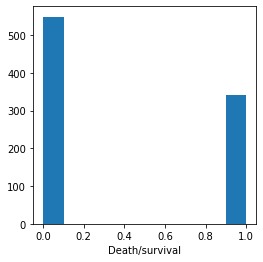

In [33]:
plt.figure(figsize=(4,4))
plt.hist(data['Survived'])
plt.xlabel('Death/survival')

plt.show()

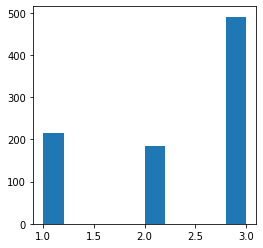

In [34]:
plt.figure(figsize=(4,4))
plt.hist(data['Pclass'])
plt.show()

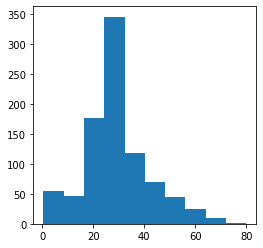

In [35]:
plt.figure(figsize=(4,4))
plt.hist(data['Filled_Age'])
plt.show()

In [36]:
data.columns

Index(['Sex', 'Embarked_C', 'Embarked_Q', 'Embarked_S', 'PassengerId',
       'Survived', 'Pclass', 'Name', 'Ticket', 'Fare', 'Cabin', 'Filled_Age',
       'family_size'],
      dtype='object')

In [37]:
from pandas.plotting import scatter_matrix

In [38]:
attributes=['Sex','Survived','Pclass','Filled_Age']

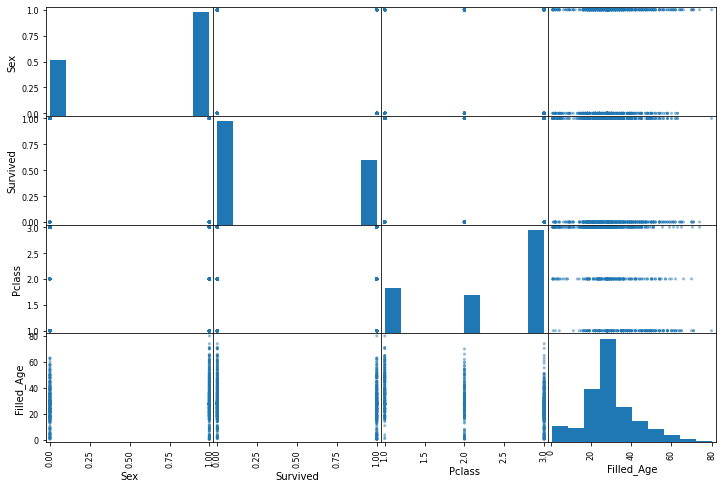

In [39]:
scatter_matrix(data[attributes], figsize=(12,8))
plt.show()

In [40]:
data.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,PassengerId,Survived,Pclass,Name,Ticket,Fare,Cabin,Filled_Age,family_size
0,1,0,0,1,1,0,3,"Braund, Mr. Owen Harris",A/5 21171,7.2500,NaN,22.0,1
1,0,1,0,0,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",PC 17599,71.2833,C85,38.0,1
2,0,0,0,1,3,1,3,"Heikkinen, Miss. Laina",STON/O2. 3101282,7.9250,NaN,26.0,0
3,0,0,0,1,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",113803,53.1000,C123,35.0,1
4,1,0,0,1,5,0,3,"Allen, Mr. William Henry",373450,8.0500,NaN,35.0,0


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          891 non-null    int64  
 1   Embarked_C   891 non-null    uint8  
 2   Embarked_Q   891 non-null    uint8  
 3   Embarked_S   891 non-null    uint8  
 4   PassengerId  891 non-null    int64  
 5   Survived     891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Name         891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Filled_Age   891 non-null    float64
 12  family_size  891 non-null    int64  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [74]:
corr_matrix = data.corr()
corr_col = corr_matrix.index

In [43]:
corr_matrix['Survived'].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Embarked_C     0.168240
family_size    0.016639
Embarked_Q     0.003650
PassengerId   -0.005007
Filled_Age    -0.064910
Embarked_S    -0.149683
Pclass        -0.338481
Sex           -0.543351
Name: Survived, dtype: float64

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sex          891 non-null    int64  
 1   Embarked_C   891 non-null    uint8  
 2   Embarked_Q   891 non-null    uint8  
 3   Embarked_S   891 non-null    uint8  
 4   PassengerId  891 non-null    int64  
 5   Survived     891 non-null    int64  
 6   Pclass       891 non-null    int64  
 7   Name         891 non-null    object 
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Filled_Age   891 non-null    float64
 12  family_size  891 non-null    int64  
dtypes: float64(2), int64(5), object(3), uint8(3)
memory usage: 72.3+ KB


In [45]:
x=data.drop(['PassengerId','Name','Ticket','Fare','Cabin','Survived'],axis=1)
y=data['Survived']

In [46]:
x.head()

,Sex,Embarked_C,Embarked_Q,Embarked_S,Pclass,Filled_Age,family_size
0,1,0,0,1,3,22.0,1
1,0,1,0,0,1,38.0,1
2,0,0,0,1,3,26.0,0
3,0,0,0,1,1,35.0,1
4,1,0,0,1,3,35.0,0


In [47]:
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [48]:
from sklearn.preprocessing import StandardScaler

In [49]:
stan_scale=StandardScaler()
x1=stan_scale.fit_transform(x)

In [50]:
x1.shape

(891, 7)

In [51]:
from sklearn.model_selection import train_test_split

In [52]:
X_train, X_test, y_train, y_test = train_test_split(x1,y,train_size=0.9)

In [53]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
#model = RandomForestRegressor()
#model = DecisionTreeRegressor()

In [54]:
model = LogisticRegression()

In [55]:
model.fit(X_train, y_train)

LogisticRegression()

In [56]:
model.score(X_test,y_test)

0.7888888888888889

In [57]:
some_data=x.iloc[0:10]
some_labels=y.iloc[0:10]

In [58]:
x2=stan_scale.transform(some_data)

In [59]:
model.predict(x2)

array([0, 1, 1, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [60]:
some_labels

0    0
1    1
2    1
3    1
4    0
5    0
6    0
7    0
8    1
9    1
Name: Survived, dtype: int64

In [61]:
#logistic reg is best model

In [62]:
from sklearn.model_selection import cross_val_score
scores=cross_val_score(model,X_train, y_train,cv=20)

In [63]:
scores

array([0.75609756, 0.8       , 0.75      , 0.75      , 0.825     ,
       0.9       , 0.775     , 0.8       , 0.75      , 0.775     ,
       0.725     , 0.8       , 0.75      , 0.9       , 0.9       ,
       0.8       , 0.725     , 0.825     , 0.9       , 0.8       ])

In [64]:
np.average(scores)

0.8003048780487806

## lets test the test data

In [65]:
y_predicted = model.predict(X_test)

In [66]:
y_predicted

array([0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0], dtype=int64)

c:\users\hrithik\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


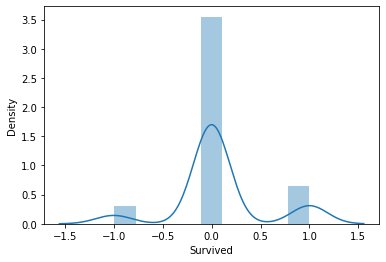

In [67]:
sns.distplot(y_test-y_predicted)
plt.show()

In [68]:
from sklearn import metrics

In [69]:
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 0.2111111111111111
MSE: 0.2111111111111111
RMSE: 0.45946829173634074


In [70]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_predicted)
cm

array([[46,  6],
       [13, 25]], dtype=int64)

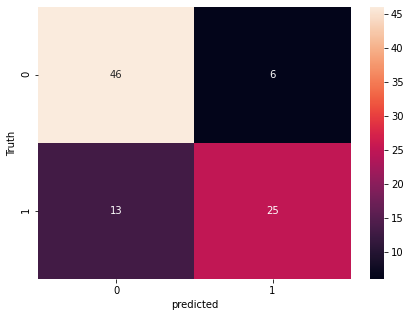

In [73]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()

In [77]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.model_selection import GridSearchCV
model_params = {
    'svm': {                                                                                ##json
        'model': svm.SVC(gamma='auto'),
        'params' : {
            'C': [1,10,20],
            'kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'C': [1,5,10]
        }
    }
}

In [78]:
scores = []

for model_name, mp in model_params.items():
    clf =  GridSearchCV(mp['model'], mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train,y_train)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.823975,"{'C': 1, 'kernel': 'rbf'}"
1,random_forest,0.784053,{'n_estimators': 5}
2,logistic_regression,0.794045,{'C': 1}


In [79]:
from sklearn.model_selection import RandomizedSearchCV
rs = RandomizedSearchCV(svm.SVC(gamma='auto'), {
        'C': [1,10,20],
        'kernel': ['rbf','linear']
    }, 
    cv=5, 
    return_train_score=False, 
    n_iter=2
)
rs.fit(X_train,y_train)
pd.DataFrame(rs.cv_results_)[['param_C','param_kernel','mean_test_score']]

,param_C,param_kernel,mean_test_score
0,10,linear,0.782795
1,10,rbf,0.820233


In [80]:
final_model = svm.SVC(gamma='auto',C=1,kernel='rbf')

In [81]:
final_model.fit(X_train,y_train)

SVC(C=1, gamma='auto')

In [82]:
final_model.score(X_test,y_test)

0.8

In [83]:
y_pred=final_model.predict(X_test)

In [84]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
cm

array([[52,  0],
       [18, 20]], dtype=int64)

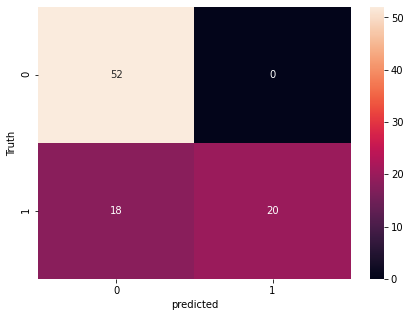

In [85]:
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=True)
plt.xlabel("predicted")
plt.ylabel("Truth")
plt.show()